In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [139]:
image = cv2.imread('./1.jpg')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


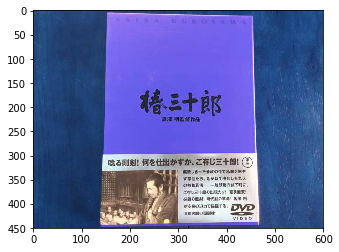

In [140]:
plt.imshow(image)

In [166]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


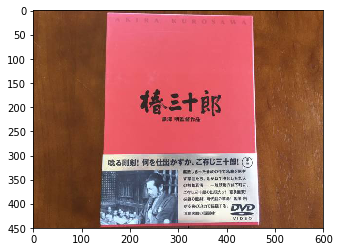

In [167]:
plt.imshow(image_rgb)

In [129]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


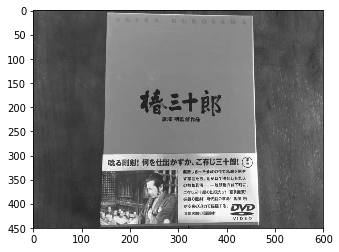

In [130]:
plt.imshow(image_gray, cmap='gray')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


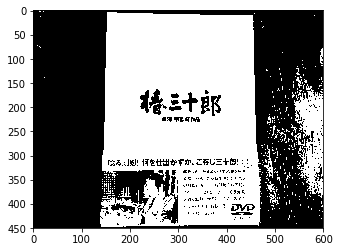

In [131]:
thresh_image = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh_image, cmap='gray')

In [132]:
find_image, contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


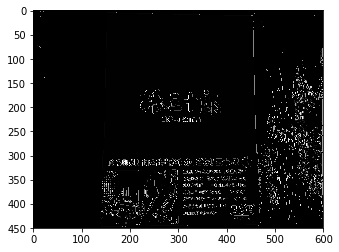

In [133]:
plt.imshow(find_image, cmap='gray')

In [134]:
draw_image = cv2.drawContours(find_image, contours, -1, (0, 0, 255), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


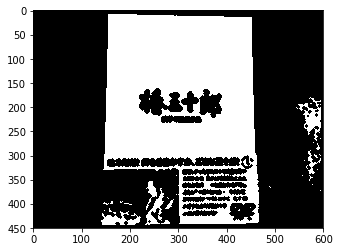

In [135]:
plt.imshow(draw_image, cmap='gray')

In [145]:
draw_image = cv2.drawContours(image_rgb, contours, -1, (0, 255, 0), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


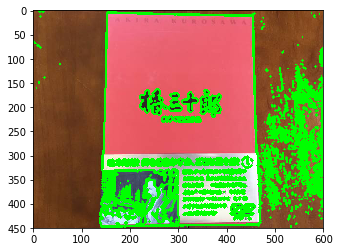

In [146]:
plt.imshow(draw_image)

In [162]:
print(contours[4])

[[[471 434]]]


In [147]:
len(contours)

1443

In [148]:
th_area = image_rgb.shape[0] * image_rgb.shape[1] / 100
contours_large = list(filter(lambda c:cv2.contourArea(c) > th_area, contours))

In [151]:
def getRectByPoints(points):
    # prepare simple array 
    points = list(map(lambda x: x[0], points))

    points = sorted(points, key=lambda x:x[1])
    top_points = sorted(points[:2], key=lambda x:x[0])
    bottom_points = sorted(points[2:4], key=lambda x:x[0])
    points = top_points + bottom_points

    left = min(points[0][0], points[2][0])
    right = max(points[1][0], points[3][0])
    top = min(points[0][1], points[1][1])
    bottom = max(points[2][1], points[3][1])
    return (top, bottom, left, right)

def getPartImageByRect(rect):
    img = cv2.imread('./1.jpg', 1)
    return img[rect[0]:rect[1], rect[2]:rect[3]]

In [168]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    x, y, w, h = cv2.boundingRect(cnt)
    outputs.append(cv2.rectangle(image_rgb,(x,y),(x+w,y+h), (0,255,0), 2))

In [173]:
len(outputs)

2

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


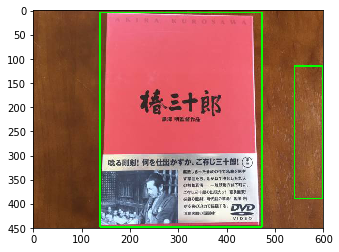

In [171]:
plt.imshow(outputs[0])

In [152]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    rect = getRectByPoints(approx)
    rects.append(rect)
    outputs.append(getPartImageByRect(rect))

In [153]:
len(rects)

2

In [154]:
rects[0]

(115, 341, 547, 598)

In [155]:
len(outputs)

2

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


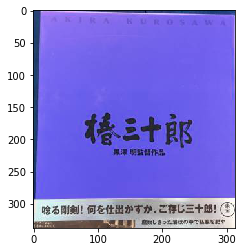

In [157]:
plt.imshow(outputs[1])

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


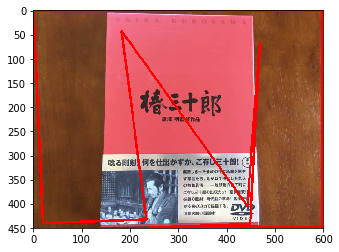

In [105]:
draw_image = cv2.drawContours(image_rgb, approxes, -1, (255, 0, 0), 3)
plt.imshow(draw_image)

In [192]:
image_2 = cv2.imread('./2.jpg')

In [193]:
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


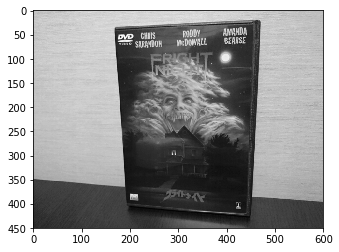

In [194]:
plt.imshow(image_2_gray, cmap='gray')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


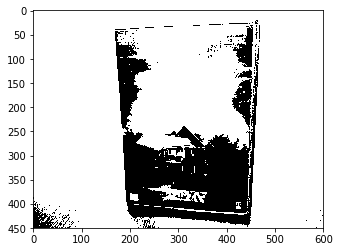

In [177]:
thresh_image = cv2.threshold(image_2_gray, 50, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh_image, cmap='gray')

In [178]:
im2, contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


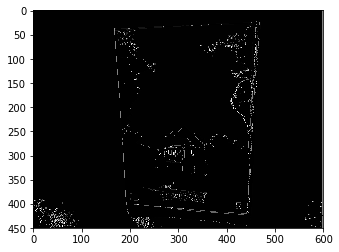

In [179]:
plt.imshow(im2, cmap='gray')

In [195]:
_image_2 = image_2.copy()
draw_image = cv2.drawContours(_image_2, contours, -1, (0, 255, 0), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


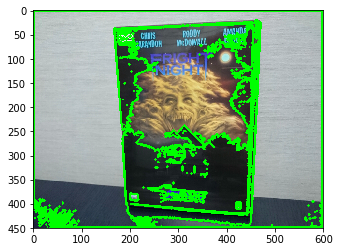

In [196]:
plt.imshow(draw_image, cmap='gray')

In [197]:
image_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
th_area = image_rgb.shape[0] * image_rgb.shape[1] / 100
contours_large = list(filter(lambda c:cv2.contourArea(c) > th_area, contours))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


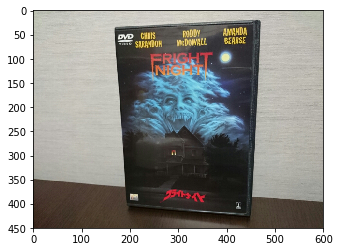

In [198]:
_image_2 = image_2.copy()
image_rgb = cv2.cvtColor(_image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [199]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    x, y, w, h = cv2.boundingRect(cnt)
    outputs.append(cv2.rectangle(_image_2,(x,y),(x+w,y+h), (0,255,0), 2))

In [200]:
len(outputs)

1

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


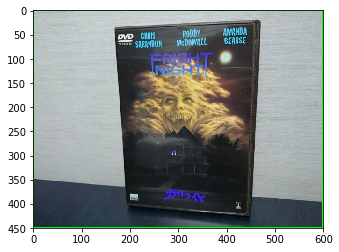

In [201]:
plt.imshow(outputs[0])

In [59]:
import glob
files = []
for file in glob.glob('./opencv/samples/cpp/left*.jpg'):
    files.append(file)

for file in glob.glob('./opencv/samples/cpp/right*.jpg'):
    files.append(file)

In [60]:
files

['./opencv/samples/cpp/left01.jpg',
 './opencv/samples/cpp/left02.jpg',
 './opencv/samples/cpp/left03.jpg',
 './opencv/samples/cpp/left04.jpg',
 './opencv/samples/cpp/left05.jpg',
 './opencv/samples/cpp/left06.jpg',
 './opencv/samples/cpp/left07.jpg',
 './opencv/samples/cpp/left08.jpg',
 './opencv/samples/cpp/left09.jpg',
 './opencv/samples/cpp/left11.jpg',
 './opencv/samples/cpp/left12.jpg',
 './opencv/samples/cpp/left13.jpg',
 './opencv/samples/cpp/left14.jpg',
 './opencv/samples/cpp/right01.jpg',
 './opencv/samples/cpp/right02.jpg',
 './opencv/samples/cpp/right03.jpg',
 './opencv/samples/cpp/right04.jpg',
 './opencv/samples/cpp/right05.jpg',
 './opencv/samples/cpp/right06.jpg',
 './opencv/samples/cpp/right07.jpg',
 './opencv/samples/cpp/right08.jpg',
 './opencv/samples/cpp/right09.jpg',
 './opencv/samples/cpp/right11.jpg',
 './opencv/samples/cpp/right12.jpg',
 './opencv/samples/cpp/right13.jpg',
 './opencv/samples/cpp/right14.jpg']

In [75]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

In [76]:
np.array(imgpoints).shape

(19, 42, 1, 2)

In [77]:
# キャリブレーション
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [72]:
# 歪み補正
img = cv2.imread(files[1])
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


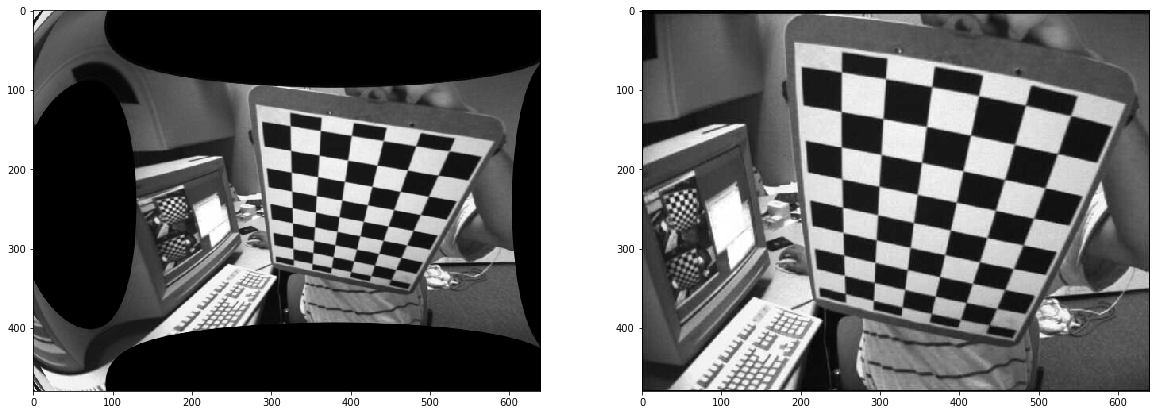

In [73]:
# 歪補正
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# 画像の切り落とし
# x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(files[1]))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


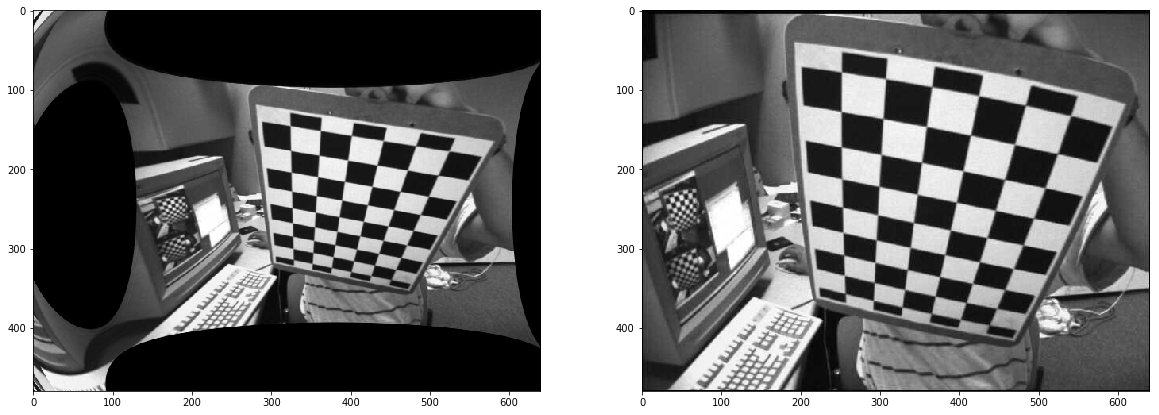

In [74]:
# 歪補正
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# 画像の切り落とし
x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(files[1]))

In [78]:
# 歪み補正
img = cv2.imread('./2.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


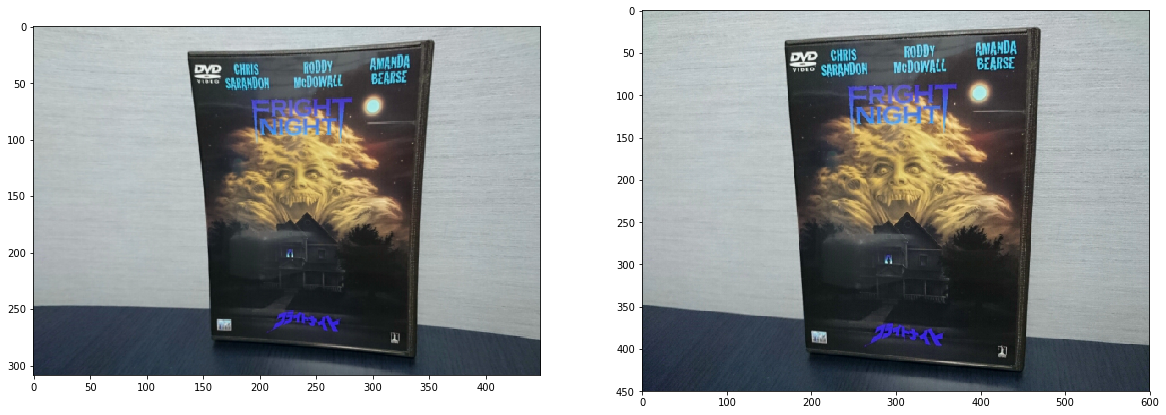

In [80]:
# 歪補正
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# 画像の切り落とし
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread('./2.jpg'))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


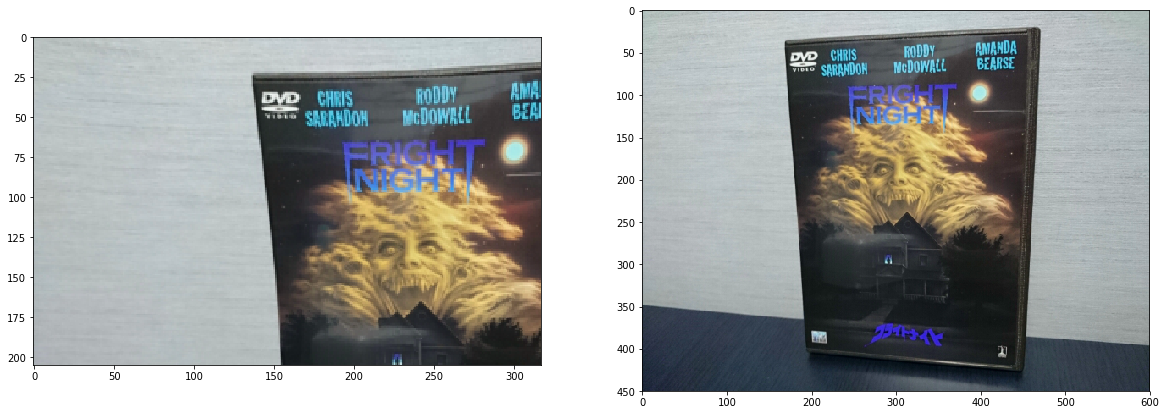

In [81]:
# 歪補正
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# 画像の切り落とし
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread('./2.jpg'))